In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def concordance_partiel_1(H, b, j, critere):
  H=new_data[new_data['productname']==H]
  b=profil[profil['profil']==b]
  c=0
  if critere == 'max':
    if H.iloc[0][j] >= b.iloc[0][j]:
      c=1
      return c
    else :
      return c
  if critere == 'min':
      if b.iloc[0][j] >= H.iloc[0][j]:
        c =1 
        return c
      else :
        return c
  return 

In [ ]:
def concordance_partiel_2(b, H, j, critere):
  H=new_data[new_data['productname']==H]
  b=profil[profil['profil']==b]
  c=0
  if critere == 'min':
    if H.iloc[0][j] >= b.iloc[0][j]:
      c=1
      return c
    else :
      return c
  if critere == 'max':
      if b.iloc[0][j] >= H.iloc[0][j]:
        c =1 
        return c
      else :
        return c
  return 

In [ ]:
def concondance_global_1(H_in, b_in, critere):
  H=new_data[new_data['productname']==H_in]
  b=profil[profil['profil']==b_in]
  num=0
  den=0
  for i in range(1,len(H.columns)):
    num += poids.iloc[0][i-1]*concordance_partiel_1(H_in, b_in, i, critere[i-1])
    den += poids.iloc[0][i-1]
  return num/den

In [ ]:
def concondance_global_2(b_in, H_in, critere):
  H=new_data[new_data['productname']==H_in]
  b=profil[profil['profil']==b_in]
  num=0
  den=0
  for i in range(1,len(H.columns)):
    num += poids.iloc[0][i-1]*concordance_partiel_2(b_in, H_in, i, critere[i-1])
    den += poids.iloc[0][i-1]
  return num/den

In [ ]:
def surclassament_1(H_in, b_in, lamb, critere):
    if concondance_global_1(H_in, b_in, critere) >= lamb:
      #print(str(H_in)+" S "+str(b_in)) 
      return 1
    else:
      #print(str(H_in)+" ne surclasse pas "+str(b_in))
      return
    return

In [ ]:
def surclassament_2(b_in, H_in, lamb, critere):
    if concondance_global_2(b_in, H_in, critere) >= lamb:
      #print(str(b_in)+" S "+str(H_in)) 
      return 1
    else:
      #print(str(b_in)+" ne surclasse pas "+str(H_in)) 
      return 0
    return

In [ ]:
def pessimiste(H_in, lamb, critere):
    for i in range(len(profil)):
      b_in= profil.iloc[i][0]
      if surclassament_1(H_in, b_in, lamb, critere) == 1:
        #print("cat:", nutri_cat[i-1])
        break
    return nutri_cat[i-1]

In [ ]:
def optimiste(H_in, lamb, critere):
    for i in range(len(profil)-1,-0,-1):
        b_in= profil.iloc[i][0]
        if surclassament_2(b_in, H_in, lamb, critere) == 1 and i==len(profil)-1:
          return nutri_cat[len(profil)-2]
        if surclassament_2(b_in, H_in, lamb, critere) == 1:
        #print("cat:", nutri_cat[i])
            break
    return nutri_cat[i]

In [ ]:
nutri_cat=['a','b','c','d']

In [ ]:
notre_data = pd.read_csv("bd3.csv")

In [ ]:
notre_data

,productname,nutrition_grade_fr,nova_group,yuka_score,yuka_categ,pnns_groups_1,additifs,bio,energy100g,saturatedfat100g,sugars100g,fiber100g,proteins100g,sodium100g,lipides_100g,sel_100g
0,Les Petits Déj' Croustillants Amaranthe et Cho...,c,4,90,Excellent,snack,0,oui,1883,2.80,21.00,8.9,8.50,0.240,17.0,0.600
1,Le bâtonnet Moelleux - 30 bâtonnets,b,4,50,Bon,produits de mer,1,non,457,0.40,2.80,1.0,8.10,0.600,4.5,1.500
2,Yaourt Framboise - Mamie Nova,c,4,30,Médiocre,produits laitier,3,non,393,1.60,12.90,0.8,3.40,0.000,2.4,0.000
3,Napolitain L'Original,e,4,0,Mauvais,snack,11,non,1792,8.90,34.00,2.0,4.20,0.096,20.0,0.240
4,Lentille vertes aux petits legumes la vie claire,b,3,94,Excellent,aliment,0,oui,317,0.00,0.20,0.0,5.00,0.416,0.3,1.040
5,Risotto Taureau Ailé,b,1,78,Excellent,aliment,0,non,1469,0.30,0.40,0.5,8.00,0.004,1.5,0.010
6,chips tyrells,d,3,50,Bon,aliment,0,oui,1996,3.00,0.70,0.0,5.20,0.520,24.4,1.300
7,Muesli croustillant tradition,b,3,88,Excellent,aliment,0,oui,1841,1.70,20.00,6.5,9.10,0.020,13.0,0.050
8,Filets de merlu meunière auchan,a,4,49,Médiocre,produits de mer,7,non,582,0.60,0.70,0.0,14.10,0.244,5.4,0.610
9,Pizza 3 Fromages Bio - picard,d,4,90,Excellent,aliment,0,oui,1114,6.10,3.40,2.5,12.00,0.424,12.2,1.060


In [ ]:
new_data= notre_data[["productname",'energy100g', 'saturatedfat100g', 'sugars100g','fiber100g','proteins100g','sodium100g',"additifs"]]

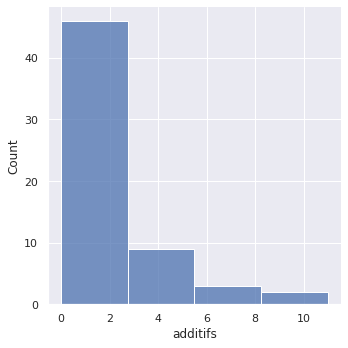

In [ ]:
sns.set_theme(style="darkgrid")
sns.displot(new_data, x='additifs', bins=4)

In [ ]:
new_data

,productname,energy100g,saturatedfat100g,sugars100g,fiber100g,proteins100g,sodium100g,additifs
0,Les Petits Déj' Croustillants Amaranthe et Cho...,1883,2.80,21.00,8.9,8.50,0.240,0
1,Le bâtonnet Moelleux - 30 bâtonnets,457,0.40,2.80,1.0,8.10,0.600,1
2,Yaourt Framboise - Mamie Nova,393,1.60,12.90,0.8,3.40,0.000,3
3,Napolitain L'Original,1792,8.90,34.00,2.0,4.20,0.096,11
4,Lentille vertes aux petits legumes la vie claire,317,0.00,0.20,0.0,5.00,0.416,0
5,Risotto Taureau Ailé,1469,0.30,0.40,0.5,8.00,0.004,0
6,chips tyrells,1996,3.00,0.70,0.0,5.20,0.520,0
7,Muesli croustillant tradition,1841,1.70,20.00,6.5,9.10,0.020,0
8,Filets de merlu meunière auchan,582,0.60,0.70,0.0,14.10,0.244,7
9,Pizza 3 Fromages Bio - picard,1114,6.10,3.40,2.5,12.00,0.424,0


In [ ]:
poids = pd.read_csv("poids_bd3.csv")
profil = pd.read_csv("bd3_profil_up.csv")

In [ ]:
profil

,profil,energie,acide gras sat.,sucre,sodium,proteine,fibre,additifs
0,b5,0,0,0,0,100,100,50
1,b4,900,13,22,2,29,20,8
2,b3,1800,27,48,4,19,14,5
3,b2,2700,41,70,6,10,6,2
4,b1,10000,100,100,50,0,0,0


In [ ]:
pessimiste("Nutella", 0.7, ['max','min','min','min','max','max', 'min'])

'd'

In [ ]:
optimiste("Galettes De MaÃ¯s", 0.5, ['max','min','min','min','max','max'])

b1 ne surclasse pas Galettes De MaÃ¯s
b2 S Galettes De MaÃ¯s


'd'

In [ ]:
bd3=new_data.copy()
bd3["pessimiste_05"]=1

In [ ]:
for i in range(len(bd3)):
    bd3["pessimiste_05"][i] = pessimiste(new_data.iloc[i]["productname"], 0.5, ['max','min','min','min','max','max', 'min'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
bd3["pessimiste_06"]=1

In [ ]:
for i in range(len(bd3)):
    bd3["pessimiste_06"][i] = pessimiste(new_data.iloc[i]["productname"], 0.6, ['max','min','min','min','max','max', 'min'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
bd3["pessimiste_07"]=1

In [ ]:
for i in range(len(bd3)):
    bd3["pessimiste_07"][i] = pessimiste(new_data.iloc[i]["productname"], 0.7, ['max','min','min','min','max','max', 'min'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
bd3["optimiste_05"]=1

In [ ]:
for i in range(len(bd3)):
    #print(i)
    bd3["optimiste_05"][i] = optimiste(new_data.iloc[i]["productname"], 0.5, ['max','min','min','min','max','max', 'min'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
bd3["optimiste_06"]=1

In [ ]:
for i in range(len(bd3)):
    #print(i)
    bd3["optimiste_06"][i] = optimiste(new_data.iloc[i]["productname"], 0.6, ['max','min','min','min','max','max', 'min'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
bd3["optimiste_07"]=1

In [ ]:
for i in range(len(bd3)):
    #print(i)
    bd3["optimiste_07"][i] = optimiste(new_data.iloc[i]["productname"], 0.7, ['max','min','min','min','max','max', 'min'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
bd3["nutriscoregrade"]=notre_data["nutrition_grade_fr"]

In [ ]:
bd3["nova_group"] = notre_data["nova_group"]

In [ ]:
bd3["yuka_score"] = notre_data["yuka_categ"]

In [ ]:
bd3

,productname,energy100g,saturatedfat100g,sugars100g,fiber100g,proteins100g,sodium100g,additifs,pessimiste_05,pessimiste_06,pessimiste_07,optimiste_05,optimiste_06,optimiste_07,nutriscoregrade,nova_group,yuka_score
0,Les Petits Déj' Croustillants Amaranthe et Cho...,1883,2.80,21.00,8.9,8.50,0.240,0,a,d,d,d,d,b,c,4,Excellent
1,Le bâtonnet Moelleux - 30 bâtonnets,457,0.40,2.80,1.0,8.10,0.600,1,d,d,d,d,b,b,b,4,Bon
2,Yaourt Framboise - Mamie Nova,393,1.60,12.90,0.8,3.40,0.000,3,d,d,d,d,d,d,c,4,Médiocre
3,Napolitain L'Original,1792,8.90,34.00,2.0,4.20,0.096,11,d,d,d,d,d,d,e,4,Mauvais
4,Lentille vertes aux petits legumes la vie claire,317,0.00,0.20,0.0,5.00,0.416,0,d,d,d,d,b,b,b,3,Excellent
5,Risotto Taureau Ailé,1469,0.30,0.40,0.5,8.00,0.004,0,a,a,d,d,b,b,b,1,Excellent
6,chips tyrells,1996,3.00,0.70,0.0,5.20,0.520,0,a,a,d,d,b,b,d,3,Bon
7,Muesli croustillant tradition,1841,1.70,20.00,6.5,9.10,0.020,0,a,d,d,d,d,b,b,3,Excellent
8,Filets de merlu meunière auchan,582,0.60,0.70,0.0,14.10,0.244,7,c,d,d,d,c,c,a,4,Médiocre
9,Pizza 3 Fromages Bio - picard,1114,6.10,3.40,2.5,12.00,0.424,0,a,c,d,c,b,b,d,4,Excellent


In [ ]:
from openpyxl.workbook import Workbook
bd3.to_excel("bd3_elec.xlsx",
             sheet_name='lambda') 